# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [63]:
# cargar datos de entrenamiento y evaluación
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
train = pd.read_csv('datasets/lab1/ej1_train.csv')

X_train = train.iloc[:, :-1]
Y_train = train['TARGET']

test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']


from sklearn.decomposition import PCA
from sklearn.svm import SVC

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?


In [10]:
train.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
# vemos la correlacion entre los features
train_corr = train.corr()
train_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
0,1.000000,0.954866,0.927352,0.999943,0.411038,0.997548,0.886824,0.526353,0.935066,-0.264687,-0.275723,-0.178065,-0.063674,0.026185,0.256591,0.251008,0.290738,-0.016597
1,0.954866,1.000000,0.774420,0.957374,0.121841,0.973265,0.709608,0.250148,0.787633,-0.163521,-0.159618,-0.066419,-0.030924,-0.036131,0.173428,0.134144,0.174756,-0.023048
2,0.927352,0.774420,1.000000,0.924093,0.722235,0.898974,0.995300,0.806245,0.999764,-0.357632,-0.387332,-0.294369,-0.096616,0.099703,0.329053,0.366200,0.399004,-0.007234
3,0.999943,0.957374,0.924093,1.000000,0.403182,0.998099,0.882809,0.519020,0.931973,-0.261729,-0.273533,-0.174763,-0.062819,0.024660,0.254782,0.247620,0.287490,-0.016545
4,0.411038,0.121841,0.722235,0.403182,1.000000,0.346399,0.785740,0.991410,0.707448,-0.382659,-0.433433,-0.388515,-0.114616,0.191453,0.325873,0.429463,0.436074,0.012963
5,0.997548,0.973265,0.898974,0.998099,0.346399,1.000000,0.852410,0.465715,0.908050,-0.242888,-0.250922,-0.153298,-0.056619,0.012154,0.239114,0.225414,0.265758,-0.018430
6,0.886824,0.709608,0.995300,0.882809,0.785740,0.852410,1.000000,0.859689,0.993043,-0.372630,-0.406966,-0.318253,-0.103418,0.117005,0.340554,0.387492,0.417110,-0.004876
7,0.526353,0.250148,0.806245,0.519020,0.991410,0.465715,0.859689,1.000000,0.793558,-0.393368,-0.443631,-0.388862,-0.119717,0.186152,0.342769,0.435593,0.446305,0.009752
8,0.935066,0.787633,0.999764,0.931973,0.707448,0.908050,0.993043,0.793558,1.000000,-0.353204,-0.382519,-0.289468,-0.095597,0.096467,0.326659,0.361175,0.393987,-0.008057
9,-0.264687,-0.163521,-0.357632,-0.261729,-0.382659,-0.242888,-0.372630,-0.393368,-0.353204,1.000000,-0.058974,-0.086952,-0.106288,-0.101143,-0.074429,-0.054229,-0.038874,-0.189495


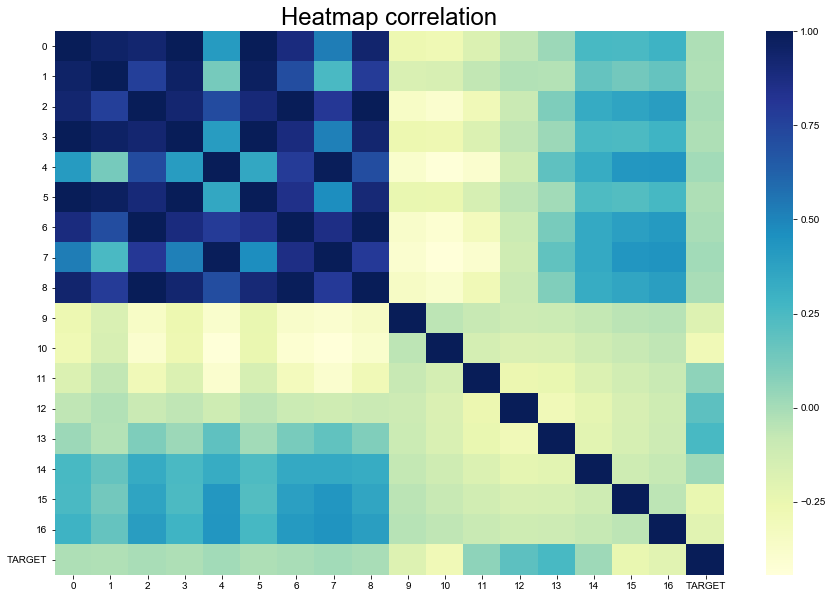

In [13]:
# graficamos la correlacion basado en el grafico de calor del problema del fraude de las tarjeras de crédito
plt.figure(figsize=(15,10))
seaborn.heatmap(train_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

### Correlacion:

A simple vista podemos obvserbar que los primeros 9 features estal altamente correlacionados.
por lo que debemos reducir la dimensionalidad en esos features.

In [57]:
# Vamos a Aplicar PCA de la libreria de sklearn. 
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

pca = PCA(n_components=10)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_Reduced = pca.transform(X_test)

In [58]:
X_train_reduced.shape

(400, 10)

In [59]:
X_train_reduced = pd.DataFrame(data=X_train_reduced, index=X_train_reduced[0:,0])

train_corr_reduced = X_train_reduced.corr()
train_corr_reduced

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,3.156021e-16,2.203789e-14,-2.076458e-14,6.065607e-14,4.506322e-14,1.844375e-14,3.605883e-14,7.770719e-14,4.953420e-15
1,3.156021e-16,1.000000e+00,-2.217198e-14,4.484111e-15,2.281606e-14,3.581732e-15,-2.086286e-14,-3.474622e-15,-2.188609e-14,-6.424743e-15
2,2.203789e-14,-2.217198e-14,1.000000e+00,-9.708267e-17,1.509392e-15,1.890725e-15,-9.711433e-16,2.254852e-15,-2.366868e-15,-1.493786e-15
3,-2.076458e-14,4.484111e-15,-9.708267e-17,1.000000e+00,-4.529268e-16,-5.064252e-16,4.763374e-16,-2.334002e-15,1.990703e-15,1.195551e-15
4,6.065607e-14,2.281606e-14,1.509392e-15,-4.529268e-16,1.000000e+00,-1.938648e-16,3.394469e-16,7.811227e-16,-1.070280e-16,1.698434e-16
5,4.506322e-14,3.581732e-15,1.890725e-15,-5.064252e-16,-1.938648e-16,1.000000e+00,-5.883586e-16,5.996393e-16,-1.997646e-16,-4.522101e-16
6,1.844375e-14,-2.086286e-14,-9.711433e-16,4.763374e-16,3.394469e-16,-5.883586e-16,1.000000e+00,1.359311e-15,-2.075550e-16,-1.276216e-15
7,3.605883e-14,-3.474622e-15,2.254852e-15,-2.334002e-15,7.811227e-16,5.996393e-16,1.359311e-15,1.000000e+00,-1.592101e-16,-4.059237e-16
8,7.770719e-14,-2.188609e-14,-2.366868e-15,1.990703e-15,-1.070280e-16,-1.997646e-16,-2.075550e-16,-1.592101e-16,1.000000e+00,-4.358890e-16
9,4.953420e-15,-6.424743e-15,-1.493786e-15,1.195551e-15,1.698434e-16,-4.522101e-16,-1.276216e-15,-4.059237e-16,-4.358890e-16,1.000000e+00


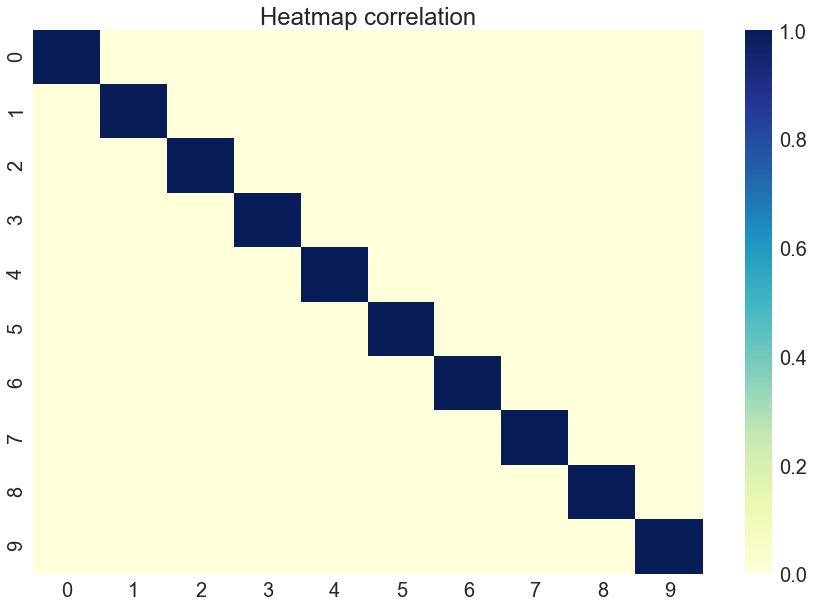

In [60]:
# Graficamos las nuevas correlaciones

plt.figure(figsize=(15,10))
seaborn.heatmap(train_corr_reduced, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

In [68]:
from sklearn.metrics import accuracy_score
clf = SVC(random_state=0, kernel="linear")

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)

print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 0.72


**Preguntas:**
- ¿Cuál es la accuracy?
  Accuracy es la relacion entre los resultados predichos con los reales, asi pues si un clasificador 
    tiene una accuracy de 1 significa que clasifico correctamente el 100% de los casos de prueba,
    pero no siempre es una buena medida, ya que le da el mismo valor a falsos positivos y a falsos negativos,
    siendo esto un problema en determinados casos.
    (como el problema que vimos en clases del detector de cancer de mamas)
    
    En este caso arrojó una accuracy de **0.72**
  
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?
  El modelo sufre de problemas de sesgo

Modifique la SVM para lograr una accuracy en train de 1.0...

In [84]:
from sklearn.metrics import accuracy_score
clf = SVC(random_state=0, kernel="linear", C=0.2, degree=0.2, gamma=0.5, )

clf.fit(X_train_reduced, Y_train)
Y_pred = clf.predict(X_train_reduced)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))



Accuracy en train:	 0.6775


In [ ]:
from sklearn.svm import SVR
clf2 = SVR(C=1.0, kernel="linear")
clf2.fit(X_train_reduced, Y_train)
Y_pred2 = clf2.predict(X_train_reduced)
print('Accuracy en train2:\t', accuracy_score(Y_train, Y_pred))

### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.


In [66]:
from sklearn.metrics import accuracy_score
clf = SVC(random_state=0, kernel="linear")

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)

Y_pred2 = clf.predict(X_test)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred2))

Accuracy en train:	 0.72
Accuracy en test:	 0.75


**Preguntas:**
- ¿Cuál es la accuracy en test?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
clf = LinearSVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [ ]:
# cargar los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

In [ ]:
del train['PassengerId']  # eliminar ids

# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.

In [ ]:
# entrenar la misma Random Forest, e imprimir el out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [ ]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

In [ ]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age

In [ ]:
# COMPLETAR: agregar columna con el largo del nombre

In [ ]:
# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER:
# train['Sex'] = train['Sex'].apply(f)

In [ ]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas

In [ ]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# entrenar el Random Forest, e imprimir out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)